In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
# Hàm đọc tệp nhị phân
def read_binary_image(file_path, size=(256, 256)):
    return np.fromfile(file_path, dtype=np.uint8).reshape(size)

def show_image(title, image):
    plt.figure(figsize=(6, 6))
    plt.title(title)
    if len(image.shape) == 2:
        plt.imshow(image, cmap='gray')
    else: 
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

def save_image(data, filename, cmap='gray', vmin=None, vmax=None):
    plt.figure()
    plt.imshow(data, cmap=cmap, vmin=vmin, vmax=vmax)
    plt.axis('off')
    plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.close()  

def mse(image1, image2):
    """Tính Mean Squared Error (MSE) giữa hai ảnh."""
    diff = image1.astype(np.float32) - image2.astype(np.float32)
    mse_value = np.mean(diff ** 2)
    return mse_value

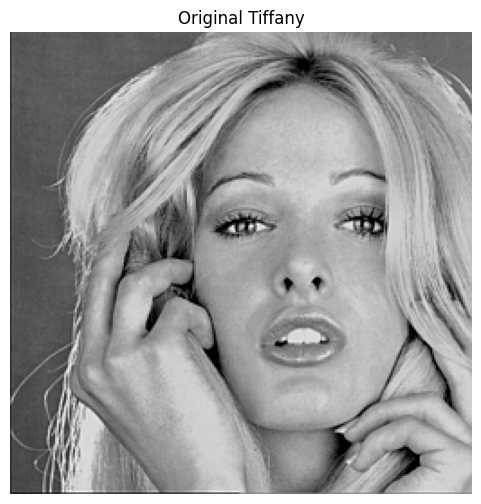

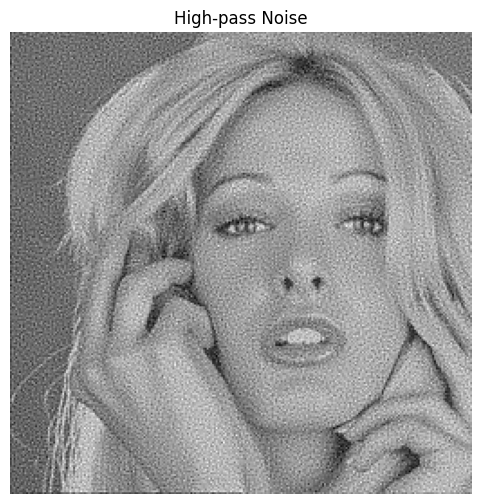

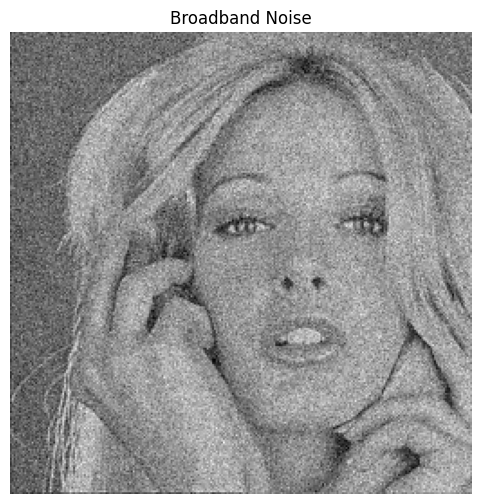

In [3]:
# Đọc hình ảnh
images = dict()

img_1 = read_binary_image("../../data/girl2bin.sec")
show_image("Original Tiffany", img_1)
save_image(img_1, "origianl_tiffany")
images ["Original"] = img_1

img_2 = read_binary_image("../../data/girl2Noise32Hibin.sec")
show_image("High-pass Noise", img_2)
save_image(img_1, "girl2Noise32Hi.png")
images ["High-pass Noise"] = img_2

img_3 = read_binary_image("../../data/girl2Noise32bin.sec")
show_image("Broadband Noise", img_3)
save_image(img_3, "girl2Noise32.png")
images ["Broadband Noise"] = img_3

In [4]:
# Tính MSE giữa các ảnh nhiễu và ảnh gốc
mse_hi = mse(images["High-pass Noise"], images["Original"])
mse_bb = mse(images["Broadband Noise"], images["Original"])

In [5]:
print(f"MSE (High-pass Noise vs Original): {mse_hi:.5f}")
print(f"MSE (Broadband Noise vs Original): {mse_bb:.5f}")

MSE (High-pass Noise vs Original): 692.50507
MSE (Broadband Noise vs Original): 744.46790
